In [ ]:
# Task 3 : Customer Churn Prediction

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
ccp=pd.read_csv(r'C:\Machine Learning Intership\Task3\Churn_Modelling.csv')

In [3]:
ccp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
ccp[ccp.duplicated()].shape[0]

0

In [6]:
ccp.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
ccp.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
ccp.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
ccp=ccp.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
ccp['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
ccp['Geography']=ccp['Geography'].replace(['France'],'0')
ccp['Geography']=ccp['Geography'].replace(['Spain'],'1')
ccp['Geography']=ccp['Geography'].replace(['Germany'],'2')
ccp['Gender']=ccp['Gender'].replace(['Female'],'0')
ccp['Gender']=ccp['Gender'].replace(['Male'],'1')

In [12]:
ccp.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
ccp['Geography']=pd.to_numeric(ccp['Geography'])
ccp['Gender']=pd.to_numeric(ccp['Gender'])

In [14]:
encoder=LabelEncoder()
ccp['Geography']=encoder.fit_transform(ccp['Geography'])
ccp['Gender']=encoder.fit_transform(ccp['Gender'])

In [15]:
ccp.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
ccp.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
ccp['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

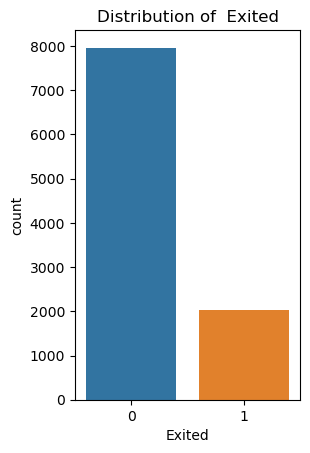

In [18]:
plt.subplot(121)
sns.countplot(data=ccp,x="Exited")
plt.title("Distribution of  Exited")
plt.show()

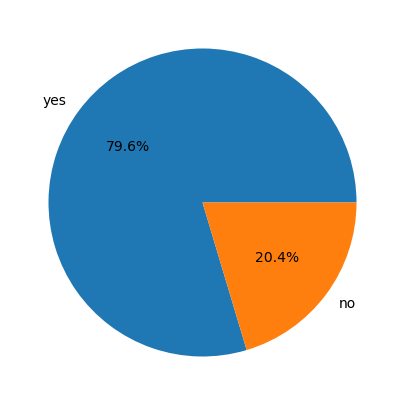

In [19]:
plt.figure(figsize=(10,5))
plt.pie(ccp['Exited'].value_counts(),autopct="%.1f%%",labels=['yes','no'])
plt.show()

In [20]:
X=ccp.drop('Geography',axis=1)
y=ccp['Geography']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[806   0 214]
 [378   0 104]
 [307   0 191]]
classification report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64      1020
           1       0.00      0.00      0.00       482
           2       0.38      0.38      0.38       498

    accuracy                           0.50      2000
   macro avg       0.31      0.39      0.34      2000
weighted avg       0.37      0.50      0.42      2000

Accuracy: 0.4985


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)
y_pred=rfc_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:",rfc_model.score(X_test, y_test))

confusion_matrix:
 [[767  64 189]
 [376  38  68]
 [179  20 299]]
classification report:
               precision    recall  f1-score   support

           0       0.58      0.75      0.65      1020
           1       0.31      0.08      0.13       482
           2       0.54      0.60      0.57       498

    accuracy                           0.55      2000
   macro avg       0.48      0.48      0.45      2000
weighted avg       0.50      0.55      0.51      2000

Accuracy Score: 0.552


In [25]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 326.8 kB/s eta 0:06:23
   ---------------------------------------- 0.1/124.9 MB 508.4 kB/s eta 0:04:06
   ---------------------------------------- 0.1/124.9 MB 403.5 kB/s eta 0:05:10
   ---------------------------------------- 0.1/124.9 MB 522.9 kB/s eta 0:03:59
   ---------------------------------------- 0.2/124.9 MB 586.1 kB/s eta 0:03:33
   ---------------------------------------- 0.2/124.9 MB 595.3 kB/s eta 0:03:30
   ---------------------------------------- 0.3/124.9 MB 682.7 kB/s eta 0:03:03
   -------------------

In [27]:
import xgboost as xgb

In [28]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:",xgb_model.score(X_test, y_test))

confusion_matrix:
 [[718 127 175]
 [356  57  69]
 [189  23 286]]
classification report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63      1020
           1       0.28      0.12      0.17       482
           2       0.54      0.57      0.56       498

    accuracy                           0.53      2000
   macro avg       0.46      0.47      0.45      2000
weighted avg       0.49      0.53      0.50      2000

Accuracy Score: 0.5305


In [29]:
results=pd.DataFrame({
    'model':['Random Forest','Logistic Regression','XGBoost'],
    'score':[0.547,0.4985,0.5305]})
result_spam=results.sort_values(by='score',ascending=False)
result_spam=result_spam.set_index('score')
result_spam.head()

,model
score,
0.5470,Random Forest
0.5305,XGBoost
0.4985,Logistic Regression
